In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.preprocessing.text as tfkpt
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
import json
from tensorflow.keras.models import model_from_json

In [2]:
anime_review_train = pd.read_csv('./../anime_scraper/anime_reviews.csv')

#### Above read dataanime for to train reviews

In [3]:
print(f"Data Shape: {anime_review_train}")

Data Shape:                                             show_title  \
0                                     my-hero-academia   
1                                     my-hero-academia   
2                                     my-hero-academia   
3                                     my-hero-academia   
4                                     my-hero-academia   
..                                                 ...   
823  high-school-prodigies-have-it-easy-even-in-ano...   
824  high-school-prodigies-have-it-easy-even-in-ano...   
825  high-school-prodigies-have-it-easy-even-in-ano...   
826  high-school-prodigies-have-it-easy-even-in-ano...   
827  high-school-prodigies-have-it-easy-even-in-ano...   

                                                review  rating  
0    It is Here! This is the future of the Shonen g...     5.0  
1    SHORT VERSION: This is one of the most thrilli...     5.0  
2    Had you ever found your favorite anime was end...     5.0  
3    Potential SpoilersMinor sp

In [4]:
print(anime_review_train.columns)

Index(['show_title', 'review', 'rating'], dtype='object')


In [5]:
ranked_anime_review = anime_review_train[['review', 'rating']].sort_values(by='rating')

In [6]:
ranked_anime_review

,review,rating
726,*edit* after watching the last couple of episo...,1.0
72,This show is bad. Not for the strawman reasons...,1.0
142,Please stop spoiling the name of the anime wit...,1.0
143,Naruto is my favorite series of all time. This...,1.0
144,"Discounting nostalgia, since I watched both se...",1.0
...,...,...
385,"A lot of people already know the story, the pe...",5.0
386,been watching this anime from the beginning an...,5.0
387,"If it's ever a progressing episode, then yeah,...",5.0
378,This anime -was- great. I enjoyed every story ...,5.0


In [7]:
ranked_anime_review['rating'].median()

5.0

In [8]:
ranked_anime_review['rating'].mode()

0    5.0
dtype: float64

In [9]:
ranked_anime_review['rating'].mean()

4.010869565217392

#### Mean and Median Score is very close to lowest score so we use regression 

In [10]:
regression_anime_review = ranked_anime_review['rating'].value_counts()

In [11]:
ra_review = ranked_anime_review.groupby(['rating'],as_index=False).count()
ra_review

,rating,review
0,1.0,91
1,2.0,56
2,3.0,86
3,3.5,18
4,4.0,65
5,4.5,46
6,5.0,466


#### math calculation of positive, negative and natural range

In [12]:
range = 50 - 10
range

40

In [13]:
round(range/3)

13

#### Math calculation says use 1.3 for each situation.
#### We check it as below analysis

In [14]:
ra_review = ra_review.rename(columns={'rating': 'points', 'review': 'count'})


In [15]:
ra_review

,points,count
0,1.0,91
1,2.0,56
2,3.0,86
3,3.5,18
4,4.0,65
5,4.5,46
6,5.0,466


In [16]:
X = ra_review['points'].values
y = ra_review['count'].values
X

array([1. , 2. , 3. , 3.5, 4. , 4.5, 5. ])

In [17]:
X=X.reshape(-1,1)
X

array([[1. ],
       [2. ],
       [3. ],
       [3.5],
       [4. ],
       [4.5],
       [5. ]])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=10)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (4, 1)
y_train shape (4,)
X_test shape (3, 1)
y_test shape (3,)
[ 86 466  91]


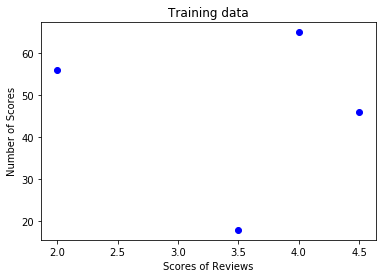

In [20]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Scores of Reviews' )
plt.ylabel('Number of Scores')
plt.title('Training data')
plt.show()

In [21]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 0.69 %
Test accuracy -90.87 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

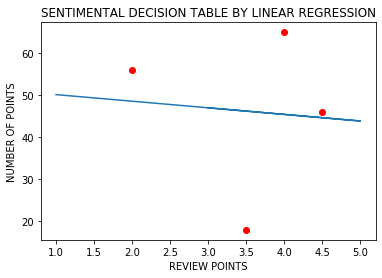

In [22]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY LINEAR REGRESSION")
plt.plot

#### We check it with Polynominal Regression

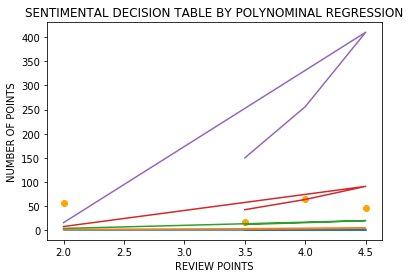

In [23]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly,y_train)
%matplotlib inline
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train, poly.fit_transform(x_train))
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY POLYNOMINAL REGRESSION")
plt.show()

In [24]:
def create_sentiment(int):
    if int >=1 and int<3:
        return 0
    if int>=3 and int<4:
        return 1
    if int>=4 and int<6:
        return 2

### Above the decision of breakpoints are given 

In [25]:
ranked_anime_review['sentiment'] = ranked_anime_review['rating'].apply(create_sentiment)

In [26]:
ranked_anime_review

,review,rating,sentiment
726,*edit* after watching the last couple of episo...,1.0,0
72,This show is bad. Not for the strawman reasons...,1.0,0
142,Please stop spoiling the name of the anime wit...,1.0,0
143,Naruto is my favorite series of all time. This...,1.0,0
144,"Discounting nostalgia, since I watched both se...",1.0,0
...,...,...,...
385,"A lot of people already know the story, the pe...",5.0,2
386,been watching this anime from the beginning an...,5.0,2
387,"If it's ever a progressing episode, then yeah,...",5.0,2
378,This anime -was- great. I enjoyed every story ...,5.0,2


In [27]:
def clean_text(str):
    return str.replace(',', ';')
                       

In [28]:
ranked_anime_review['review'] = ranked_anime_review['review'].apply(clean_text)

In [29]:
ranked_anime_review

,review,rating,sentiment
726,*edit* after watching the last couple of episo...,1.0,0
72,This show is bad. Not for the strawman reasons...,1.0,0
142,Please stop spoiling the name of the anime wit...,1.0,0
143,Naruto is my favorite series of all time. This...,1.0,0
144,Discounting nostalgia; since I watched both se...,1.0,0
...,...,...,...
385,A lot of people already know the story; the pe...,5.0,2
386,been watching this anime from the beginning an...,5.0,2
387,If it's ever a progressing episode; then yeah;...,5.0,2
378,This anime -was- great. I enjoyed every story ...,5.0,2


In [30]:
ranked_anime_review.to_csv('ranked_review.csv')

In [31]:
review_df = pd.read_csv('ranked_review.csv')

In [32]:
review_df

,Unnamed: 0,review,rating,sentiment
0,726,*edit* after watching the last couple of episo...,1.0,0
1,72,This show is bad. Not for the strawman reasons...,1.0,0
2,142,Please stop spoiling the name of the anime wit...,1.0,0
3,143,Naruto is my favorite series of all time. This...,1.0,0
4,144,Discounting nostalgia; since I watched both se...,1.0,0
...,...,...,...,...
823,385,A lot of people already know the story; the pe...,5.0,2
824,386,been watching this anime from the beginning an...,5.0,2
825,387,If it's ever a progressing episode; then yeah;...,5.0,2
826,378,This anime -was- great. I enjoyed every story ...,5.0,2


In [33]:
review_df.columns=['Unnamed: 0', 'review' , 'rating' , 'sentiment']
review_training_df = review_df[['review', 'sentiment']].dropna()
review_training_df.sample(5)

,review,sentiment
634,This show is in my top 10 anime of all time ju...,2
386,Okay when i said i would sacrifice my minecraf...,2
502,Hunter x Hunter is the definition of perfectio...,2
65,The entire show is ridiculous. I like Isekai a...,0
37,I enjoy the anime however the pacing is way to...,0


In [34]:
review_y = review_training_df.sentiment
print(review_y)

0      0
1      0
2      0
3      0
4      0
      ..
823    2
824    2
825    2
826    2
827    2
Name: sentiment, Length: 828, dtype: int64


In [35]:
review_x = review_training_df.review
print(review_x)

0      *edit* after watching the last couple of episo...
1      This show is bad. Not for the strawman reasons...
2      Please stop spoiling the name of the anime wit...
3      Naruto is my favorite series of all time. This...
4      Discounting nostalgia; since I watched both se...
                             ...                        
823    A lot of people already know the story; the pe...
824    been watching this anime from the beginning an...
825    If it's ever a progressing episode; then yeah;...
826    This anime -was- great. I enjoyed every story ...
827    VisualsThe visuals were consistent throughout ...
Name: review, Length: 828, dtype: object


In [36]:
review_training_df.describe()

,sentiment
count,828.000000
mean,1.519324
std,0.778094
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [37]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_x)

In [38]:
review_x = tokenizer.texts_to_sequences(review_x)

In [39]:
review_x = tokenizer.sequences_to_matrix(review_x)
review_x

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 1.]])

In [40]:
print(type(review_x))

<class 'numpy.ndarray'>


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation


In [42]:
print ("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [43]:
review_y = keras.utils.to_categorical(review_y,3)

In [44]:
review_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

#### x and y axis created for machine learning, now it is time for layers between input and output

In [45]:
model = Sequential()

#### 1st layer act Sigmoid drop 1 at 10%

In [46]:
model.add(Dense(755, activation='sigmoid'))
model.add(Dropout(0.1))

#### 2nd layer act Rectified Linear Drop 1 at 20%

In [47]:
model.add(Dense(555, activation = 'relu'))
model.add(Dropout(0.2))

#### 3rd layer act Linear Drop 1 at 40%

In [48]:
model.add(Dense(333, activation = 'linear'))
model.add(Dropout(0.40))

#### 4th layer act softsign no drop

In [49]:
model.add(Dense(33, activation = 'softsign'))


#### 5th layer act softmax no drop

In [50]:
model.add(Dense(3, activation = 'softmax'))

#### Compile the model

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
model.fit(
    review_x, review_y,
    batch_size=35,
    epochs=7,
    verbose=1,
    validation_split=0.2)

Train on 662 samples, validate on 166 samples
Epoch 1/7
662/662 [==============================] - 2s 2ms/sample - loss: 1.0029 - accuracy: 0.5831 - val_loss: 0.7017 - val_accuracy: 1.0000
Epoch 2/7
662/662 [==============================] - 1s 1ms/sample - loss: 0.9296 - accuracy: 0.6224 - val_loss: 0.4884 - val_accuracy: 1.0000
Epoch 3/7
662/662 [==============================] - 1s 1ms/sample - loss: 0.9297 - accuracy: 0.6208 - val_loss: 0.5571 - val_accuracy: 1.0000
Epoch 4/7
662/662 [==============================] - 1s 1ms/sample - loss: 0.9199 - accuracy: 0.6208 - val_loss: 0.4775 - val_accuracy: 1.0000
Epoch 5/7
662/662 [==============================] - 1s 1ms/sample - loss: 0.8905 - accuracy: 0.6208 - val_loss: 0.5728 - val_accuracy: 1.0000
Epoch 6/7
662/662 [==============================] - 1s 1ms/sample - loss: 0.8602 - accuracy: 0.6224 - val_loss: 0.6589 - val_accuracy: 1.0000
Epoch 7/7
662/662 [==============================] - 1s 1ms/sample - loss: 0.7424 - accuracy: 0.

In [53]:
review_model_1 = model.to_json()
with open('review_model_1.json', 'w') as json_file:
    json_file.write(review_model_1)
model.save_weights('review_model_1.h5')

In [54]:
review_dict_1 = tokenizer.word_index
with open('review_dict_1.json', 'w') as d:
    json.dump(review_dict_1, d)

In [55]:
tokenizer = Tokenizer(num_words=9900)

In [56]:
labels = ['negative', 'natural', 'positive']

In [57]:
with open('review_dict_1.json', 'r') as dictionary_file:
    dictionary = json.load(dictionary_file)

In [58]:
def convert_text_to_index_array(text):
    words = tfkpt.text_to_word_sequence(text)
    testArr = []
    for word in words:
        if word in dictionary:
            testArr.append(dictionary[word])
        else:
            print("'%s' not in training corpus; ignoring." %(word))
    return testArr
    print(wordIndices)

In [59]:
json_file = open('review_model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [60]:
model = model_from_json(loaded_model_json)

In [61]:
model.load_weights('review_model_1.h5')

In [62]:
evalSentence = input('Tell me your idea, Enter to quit: ')


        

Tell me your idea, Enter to quit:  KJHKJL


In [63]:
testArr = convert_text_to_index_array(evalSentence)
print(evalSentence)

'kjhkjl' not in training corpus; ignoring.
KJHKJL


In [64]:
input = tokenizer.sequences_to_matrix([testArr], mode='binary')

In [65]:
pred = model.predict(input)
print(input)
print(testArr)
print(model)

print(testArr)
print('*******',pred)


[[0. 0. 0. ... 0. 0. 0.]]
[]
[]
******* [[0.23082401 0.10403465 0.66514134]]


In [66]:
print("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)]* 100))

positive sentiment; 66.514134% confidence
